In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras torch nltk joblib pydot torchviz torchinfo xgboost transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import joblib

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import xgboost as xgb
from xgboost import plot_tree
from xgboost import XGBClassifier
from xgboost import plot_importance

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from transformers import BertTokenizer, BertModel

In [4]:
# Thiết lập device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/TTTN-Dataset/balanced_dataset_1.csv')
df.head(10)

,url,url_len,hostname_len,entropy,nb_dots,nb_hyphens,nb_exclamation,nb_and,nb_equal,nb_underscore,...,percent_ex_media,percent_safe_anchor,percent_in_links,whois_reg_domain,domain_reg_len,domain_age,dns_record,google_index,page_rank,label
0,http://www.goebcomputer.de/index.php?option=co...,85,19,-4.551858,3,0,1,3,4,1,...,0.0,0.0,0.0,0,0,-2,0,-1,0,defacement
1,http://www.onestoprecycling.co.uk/index.php?op...,91,26,-4.619352,4,0,1,3,4,1,...,0.0,0.0,0.0,0,169,6039,0,-1,2,defacement
2,http://116.113.182.195:58245/Mozi.m,35,15,-3.957296,4,0,0,0,0,0,...,0.0,0.0,0.0,1,0,-2,1,-1,0,malware
3,https://pacovilla.com/?p=52334,30,13,-4.189898,1,0,1,0,1,0,...,0.0,0.0,0.0,0,26,1799,0,-1,3,benign
4,https://genforum.genealogy.com/mcshane/page2.html,49,22,-4.142486,3,0,0,0,0,0,...,0.0,0.0,0.0,0,206,9655,0,-1,5,benign
5,https://www.engr.du.edu/profile/marvin.htm,42,15,-4.225185,4,0,0,0,0,0,...,0.0,0.0,0.0,0,744,13656,0,-1,5,phishing
6,https://2online.tv/tele-quebec/,31,10,-3.934530,1,1,0,0,0,0,...,0.0,0.0,0.0,1,0,-2,1,-1,0,benign
7,http://www.sciclubmarzocco.it/index.html?optio...,121,22,-4.698126,3,1,1,5,6,1,...,0.0,0.0,0.0,0,0,-2,1,-1,0,defacement
8,https://lumennex.pro/downloads/Lumen.rar,40,12,-4.115312,2,0,0,0,0,0,...,0.0,0.0,0.0,0,290,74,1,-1,0,malware
9,http://114.228.141.191:38264/Mozi.m,35,15,-3.878585,4,0,0,0,0,0,...,0.0,0.0,0.0,1,0,-2,1,-1,0,malware


In [6]:
# Preprocess labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(df['label'])
labels_one_hot = tf.keras.utils.to_categorical(labels_encoded)
label_names = label_encoder.classes_

In [7]:
X1 = df.drop(columns=['label', 'url'])
X1.shape

(385260, 71)

In [8]:
# MinMaxScaler except for these columns
columns_to_scale = [col for col in X1.columns if col not in ['domain_reg_len', 'domain_age', 'page_rank', 'google_index']]
scaler = MinMaxScaler(feature_range=(0, 1))
X1[columns_to_scale] = scaler.fit_transform(X1[columns_to_scale])
joblib.dump(scaler, 'scaler.pkl') #Download for predict
X1.head(10)

,url_len,hostname_len,entropy,nb_dots,nb_hyphens,nb_exclamation,nb_and,nb_equal,nb_underscore,nb_tilde,...,percent_in_media,percent_ex_media,percent_safe_anchor,percent_in_links,whois_reg_domain,domain_reg_len,domain_age,dns_record,google_index,page_rank
0,0.042397,0.072650,0.377669,0.071429,0.000000,0.066667,0.06,0.078431,0.02381,0.0,...,0.0,0.0,0.0,0.0,0.0,0,-2,0.0,-1,0
1,0.045789,0.102564,0.360328,0.095238,0.000000,0.066667,0.06,0.078431,0.02381,0.0,...,0.0,0.0,0.0,0.0,0.0,169,6039,0.0,-1,2
2,0.014132,0.055556,0.530432,0.095238,0.000000,0.000000,0.00,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,1.0,0,-2,1.0,-1,0
3,0.011306,0.047009,0.470669,0.023810,0.000000,0.066667,0.00,0.019608,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,26,1799,0.0,-1,3
4,0.022046,0.085470,0.482851,0.071429,0.000000,0.000000,0.00,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,206,9655,0.0,-1,5
5,0.018089,0.055556,0.461602,0.095238,0.000000,0.000000,0.00,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,744,13656,0.0,-1,5
6,0.011871,0.034188,0.536281,0.023810,0.015625,0.000000,0.00,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,1.0,0,-2,1.0,-1,0
7,0.062747,0.085470,0.340088,0.071429,0.015625,0.066667,0.10,0.117647,0.02381,0.0,...,0.0,0.0,0.0,0.0,0.0,0,-2,1.0,-1,0
8,0.016959,0.042735,0.489833,0.047619,0.000000,0.000000,0.00,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,290,74,1.0,-1,0
9,0.014132,0.055556,0.550656,0.095238,0.000000,0.000000,0.00,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,1.0,0,-2,1.0,-1,0


In [9]:
Y1 = pd.DataFrame(labels_one_hot, columns=label_encoder.classes_)
Y1.to_csv('/content/drive/MyDrive/TTTN-Dataset/labels_one_hot.csv', index=False)
Y3 = np.argmax(Y1.values, axis=1)
Y1.shape

(385260, 4)

In [10]:
X2 = df['url']
X2.head(2)


,url
0,http://www.goebcomputer.de/index.php?option=co...
1,http://www.onestoprecycling.co.uk/index.php?op...


# CREATE DATASET WITH PRIOR FEATURES EXTRACTION

In [ ]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [ ]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

print(X_train1.shape, Y_train1.shape)

(308208, 71, 1) (308208, 4)


In [ ]:
input_size1 = X_train1[1].shape

# CREATE DATASET WITHOUT PRIOR FEATURES EXTRACTION

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X, corpus_t):
    for i in range(len(X)):
        print(i, "/", len(X))
        review = X[i].decode('utf-8') if isinstance(X[i], bytes) else X[i]
        review = re.sub(r'\?.*', '', review)  # Bỏ query parameters
        review = re.sub(r'[^a-zA-Z0-9\-\/.]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
        review = " ".join(review)
        corpus_t.append(review)

albumentations(X2, corpus_train)

Streaming output truncated to the last 5000 lines.
380260 / 385260
380261 / 385260
380262 / 385260
380263 / 385260
380264 / 385260
380265 / 385260
380266 / 385260
380267 / 385260
380268 / 385260
380269 / 385260
380270 / 385260
380271 / 385260
380272 / 385260
380273 / 385260
380274 / 385260
380275 / 385260
380276 / 385260
380277 / 385260
380278 / 385260
380279 / 385260
380280 / 385260
380281 / 385260
380282 / 385260
380283 / 385260
380284 / 385260
380285 / 385260
380286 / 385260
380287 / 385260
380288 / 385260
380289 / 385260
380290 / 385260
380291 / 385260
380292 / 385260
380293 / 385260
380294 / 385260
380295 / 385260
380296 / 385260
380297 / 385260
380298 / 385260
380299 / 385260
380300 / 385260
380301 / 385260
380302 / 385260
380303 / 385260
380304 / 385260
380305 / 385260
380306 / 385260
380307 / 385260
380308 / 385260
380309 / 385260
380310 / 385260
380311 / 385260
380312 / 385260
380313 / 385260
380314 / 385260
380315 / 385260
380316 / 385260
380317 / 385260
380318 / 385260
38031

In [ ]:
corpus_train[:4]

['http //www.goebcomputer.de/index.php',
 'http //www.onestoprecycling.co.uk/index.php',
 'http //116.113.182.195 58245/mozi.m',
 'http //pacovilla.com/']

In [ ]:
cv = TfidfVectorizer(max_features=300)
X2 = cv.fit_transform(corpus_train)
joblib.dump(cv, "tfidf_vectorizer.pkl") # Download for predict

['tfidf_vectorizer.pkl']

In [ ]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [ ]:
X_train2, Y_train2 = resample(X_train2, Y_train2, n_samples=150000, random_state=42, stratify=Y_train2)

In [ ]:
X_train2 = np.expand_dims(X_train2.toarray(), axis=-1)  # Shape: (308208, 500, 1)
X_test2 = np.expand_dims(X_test2.toarray(), axis=-1)    # Shape: (77052, 500, 1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(150000, 300, 1) (150000, 4)
(77052, 300, 1) (77052, 4)


In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train2, Y_train2))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128).prefetch(tf.data.AUTOTUNE)

# val_size = int(0.2 * X_train2.shape[0])
# val_dataset = tf.data.Dataset.from_tensor_slices((X_train2[-val_size:], Y_train2[-val_size:]))
# val_dataset = val_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

In [ ]:
# for x_batch, y_batch in train_dataset.take(1):
#     print(x_batch.shape)
#     print(y_batch.shape)

In [ ]:
input_size2 = X_train2[2].shape
input_size1,input_size2

((71, 1), (300, 1))

# CREATE DATASET FOR XGB (NUMERICAL)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
X3 = df.drop(columns=['label', 'url'])
Y3 = pd.Series(Y3)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in splitter.split(X3, X3['is_alive']):
    X_train3, X_test3 = X3.iloc[train_idx], X3.iloc[test_idx]
    Y_train3, Y_test3 = Y3.iloc[train_idx], Y3.iloc[test_idx]
print(X_train3.shape,Y_train3.shape)
print(X_test3.shape,Y_test3.shape)

(308208, 71) (308208,)
(77052, 71) (77052,)


# CREATE DATASET FOR XGB (NON-NUMERICAL)

In [ ]:
X4 = df['url']

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus_train = []
def albumentations(X, corpus_t):
    for i in range(len(X)):
        print(i, "/", len(X))
        review = X[i].decode('utf-8') if isinstance(X[i], bytes) else str(X[i])  # Ensure string handling
        review = re.sub(r'\?.*', '', review)  # Remove query parameters
        review = re.sub(r'[^a-zA-Z0-9\-\/.]', ' ', review)  # Keep -, /, .
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stopwords and len(word) > 2]  # Use stopwords_set
        review = " ".join(review)
        corpus_t.append(review)

albumentations(X4, corpus_train)

Streaming output truncated to the last 5000 lines.
380260 / 385260
380261 / 385260
380262 / 385260
380263 / 385260
380264 / 385260
380265 / 385260
380266 / 385260
380267 / 385260
380268 / 385260
380269 / 385260
380270 / 385260
380271 / 385260
380272 / 385260
380273 / 385260
380274 / 385260
380275 / 385260
380276 / 385260
380277 / 385260
380278 / 385260
380279 / 385260
380280 / 385260
380281 / 385260
380282 / 385260
380283 / 385260
380284 / 385260
380285 / 385260
380286 / 385260
380287 / 385260
380288 / 385260
380289 / 385260
380290 / 385260
380291 / 385260
380292 / 385260
380293 / 385260
380294 / 385260
380295 / 385260
380296 / 385260
380297 / 385260
380298 / 385260
380299 / 385260
380300 / 385260
380301 / 385260
380302 / 385260
380303 / 385260
380304 / 385260
380305 / 385260
380306 / 385260
380307 / 385260
380308 / 385260
380309 / 385260
380310 / 385260
380311 / 385260
380312 / 385260
380313 / 385260
380314 / 385260
380315 / 385260
380316 / 385260
380317 / 385260
380318 / 385260
38031

In [ ]:
cv = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X4 = cv.fit_transform(corpus_train)
joblib.dump(cv, "tfidf_vectorizer_XGB.pkl")

['tfidf_vectorizer_XGB.pkl']

In [ ]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y3, stratify=Y3, test_size=0.2, random_state=42)
print(X_train4.shape, Y_train4.shape)
print(X_test4.shape, Y_test4.shape)

(308208, 1000) (308208,)
(77052, 1000) (77052,)


# CREATE DATASET FOR TRANSFORMERS (NON-NUMERICAL ONLY)

In [ ]:
import gc
from huggingface_hub import login
login("your_HF_token") #Thay bằng Token tạo trong HuggingFace

In [ ]:
Y4 = Y1.values.argmax(axis=1)

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X2, Y4, stratify=Y4, test_size=0.2, random_state=42
)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def tokenize_urls(urls, max_length=64):
    url_list = urls.tolist() if isinstance(urls, pd.Series) else list(urls)
    url_list = [url if url.strip() else 'placeholder' for url in url_list]
    return tokenizer(
        url_list,
        max_length=max_length,
        padding=True,
        truncation=True,
        return_tensors='pt'
    )

In [ ]:
train_encodings_trans = tokenize_urls(X_train5)
test_encodings_trans = tokenize_urls(X_test5)

In [ ]:
class MultiClassDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Categorical index (0-3)
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset_trans = MultiClassDataset(train_encodings_trans, y_train5)
test_dataset_trans = MultiClassDataset(test_encodings_trans, y_test5)

In [ ]:
train_loader_trans = DataLoader(train_dataset_trans, batch_size=64, shuffle=True)
test_loader_trans = DataLoader(test_dataset_trans, batch_size=64)

# EVALUATION HELPER FUNCTIONS

In [ ]:
def eval_graph_CNN(results):
    plt.figure(figsize=(14, 7))
    plt.plot(results.history['accuracy'], 'r', label="Training Accuracy")
    plt.plot(results.history['val_accuracy'], 'b', label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    plt.figure(figsize=(14, 7))
    plt.plot(results.history['loss'], 'r', label="Training Loss")
    plt.plot(results.history['val_loss'], 'b', label="Validation Loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [ ]:
def conf_matrix_multi_class_CNN(X_test, Y_test, model, label_names):
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    Y_test_labels = np.argmax(Y_test, axis=1)
    cm = confusion_matrix(Y_test_labels, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()
    f1 = f1_score(Y_test_labels, Y_pred, average='macro')
    print(f"Macro F1-Score: {f1:.4f}")

In [ ]:
def pr_auc_multi_class_CNN(X_test, Y_test, model, label_names):
    # Đảm bảo X_test và Y_test là mảng NumPy
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    if len(X_test.shape) == 2:
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    Y_pred_proba = model.predict(X_test)
    Y_test_binary = (Y_test > 0.5).astype(int)

    n_classes = Y_test.shape[1]
    plt.figure(figsize=(14, 7))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(Y_test_binary[:, i], Y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{label_names[i]} (PR-AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRECISION-RECALL CURVES FOR MULTI-LABEL CLASSIFICATION')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    pr_aucs = [auc(precision_recall_curve(Y_test_binary[:, i], Y_pred_proba[:, i])[1],
                   precision_recall_curve(Y_test_binary[:, i], Y_pred_proba[:, i])[0]) for i in range(n_classes)]
    macro_pr_auc = np.mean(pr_aucs)
    print(f"Macro PR-AUC: {macro_pr_auc:.4f}")

In [13]:
def conf_matrix_multi_class_XGB(X_test, y_test, model, label_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX (XGBoost)')
    plt.show()
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1-Score: {f1:.4f}")

In [14]:
def eval_graph_XGB(results):
    epochs = range(len(results['validation_0']['mlogloss']))
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, [1 - x for x in results['validation_0']['merror']], 'b', label="Validation Accuracy (1 - Error)")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH (XGBoost)")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, results['validation_0']['mlogloss'], 'b', label="Validation Loss (Log Loss)")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH (XGBoost)")
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.show()

In [ ]:
def conf_matrix_multi_class_RF(X_test, y_test, model, label_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX (Random Forest)')
    plt.show()
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1-Score: {f1:.4f}")

In [ ]:
def pr_auc_multi_class_RF(X_test, y_test, model, label_names):
    y_pred_proba = model.predict_proba(X_test)  # Shape: (n_samples, n_classes)
    y_test_one_hot = np.eye(len(label_names))[y_test]  # Chuyển y_test sang one-hot
    n_classes = len(label_names)
    plt.figure(figsize=(14, 7))
    pr_aucs = []
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        pr_aucs.append(pr_auc)
        plt.plot(recall, precision, label=f'{label_names[i]} (PR-AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRECISION-RECALL CURVES FOR MULTI-CLASS CLASSIFICATION (Random Forest)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    macro_pr_auc = np.mean(pr_aucs)
    print(f"Macro PR-AUC: {macro_pr_auc:.4f}")

In [ ]:
def eval_graph_BERT(results):
    acc = results['accuracy']
    val_acc = results['val_accuracy']
    epochs = range(len(acc))
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, acc, 'r', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()

    loss = results['loss']
    val_loss = results['val_loss']
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, loss, 'r', label="Training Loss")
    plt.plot(epochs, val_loss, 'b', label="Validation Loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [ ]:
from torch import amp
def conf_matrix_multi_class_BERT(test_loader, Y_test, model, label_names, tokenizer, batch_size=128, device='cuda'):
    model.eval()
    model.to(device)

    Y_pred = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            with amp.autocast('cuda'):  # Updated to new autocast API
                logits = model(input_ids, attention_mask)
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            Y_pred.extend(preds)

    Y_pred = np.array(Y_pred)
    Y_test_labels = np.array(Y_test)

    cm = confusion_matrix(Y_test_labels, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

    f1 = f1_score(Y_test_labels, Y_pred, average='macro')
    print(f"Macro F1-Score: {f1:.4f}")

In [ ]:
def pr_auc_multi_class_BERT(X_test, Y_test, model, label_names, tokenizer, batch_size=128, device='cuda'):
    # Chuyển model sang eval mode và device
    model.eval()
    model.to(device)

    # Tokenize X_test (URLs)
    test_encodings = tokenizer(
        X_test.tolist(),
        max_length=64,
        padding=True,
        truncation=True,
        return_tensors='pt'
    )

    # Tạo Dataset và DataLoader cho batch processing (tiết kiệm memory cho dataset lớn)
    class TestDataset(torch.utils.data.Dataset):
        def __init__(self, encodings):
            self.encodings = encodings

        def __getitem__(self, idx):
            return {key: val[idx] for key, val in self.encodings.items()}

        def __len__(self):
            return len(self.encodings['input_ids'])

    test_dataset = TestDataset(test_encodings)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Predict probabilities
    Y_pred_proba = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            logits = model(input_ids, attention_mask)
            probs = torch.softmax(logits, dim=1).cpu().numpy()  # Softmax cho multi-class probabilities
            Y_pred_proba.extend(probs)

    Y_pred_proba = np.array(Y_pred_proba)
    Y_test = np.array(Y_test)

    # Nếu Y_test là categorical, chuyển sang one-hot
    if Y_test.ndim == 1:
        from sklearn.preprocessing import OneHotEncoder
        enc = OneHotEncoder(sparse_output=False)
        Y_test = enc.fit_transform(Y_test.reshape(-1, 1))

    # Binary indicators cho one-vs-rest
    Y_test_binary = Y_test  # Đã là one-hot, giả sử >0.5 nếu cần, nhưng cho multi-class thường là 0/1 exact

    n_classes = Y_test.shape[1]
    pr_aucs = []

    plt.figure(figsize=(14, 7))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(Y_test_binary[:, i], Y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        pr_aucs.append(pr_auc)
        plt.plot(recall, precision, label=f'{label_names[i]} (PR-AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRECISION-RECALL CURVES FOR MULTI-CLASS CLASSIFICATION (ONE-VS-REST)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    macro_pr_auc = np.mean(pr_aucs)
    print(f"Macro PR-AUC: {macro_pr_auc:.4f}")

# CNN MODEL(Multi-Classes)

In [ ]:
def CNN1(input_size, num_classes=4):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(64 if input_size[0] <= 100 else 128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

def CNN2(input_size, num_classes=4):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

CNN_model1 = CNN1(input_size1)
CNN_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 71, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 71, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 71, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 36, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,172 (1.25 MB)

 Trainable params: 326,724 (1.25 MB)

 Non-trainable params: 448 (1.75 KB)

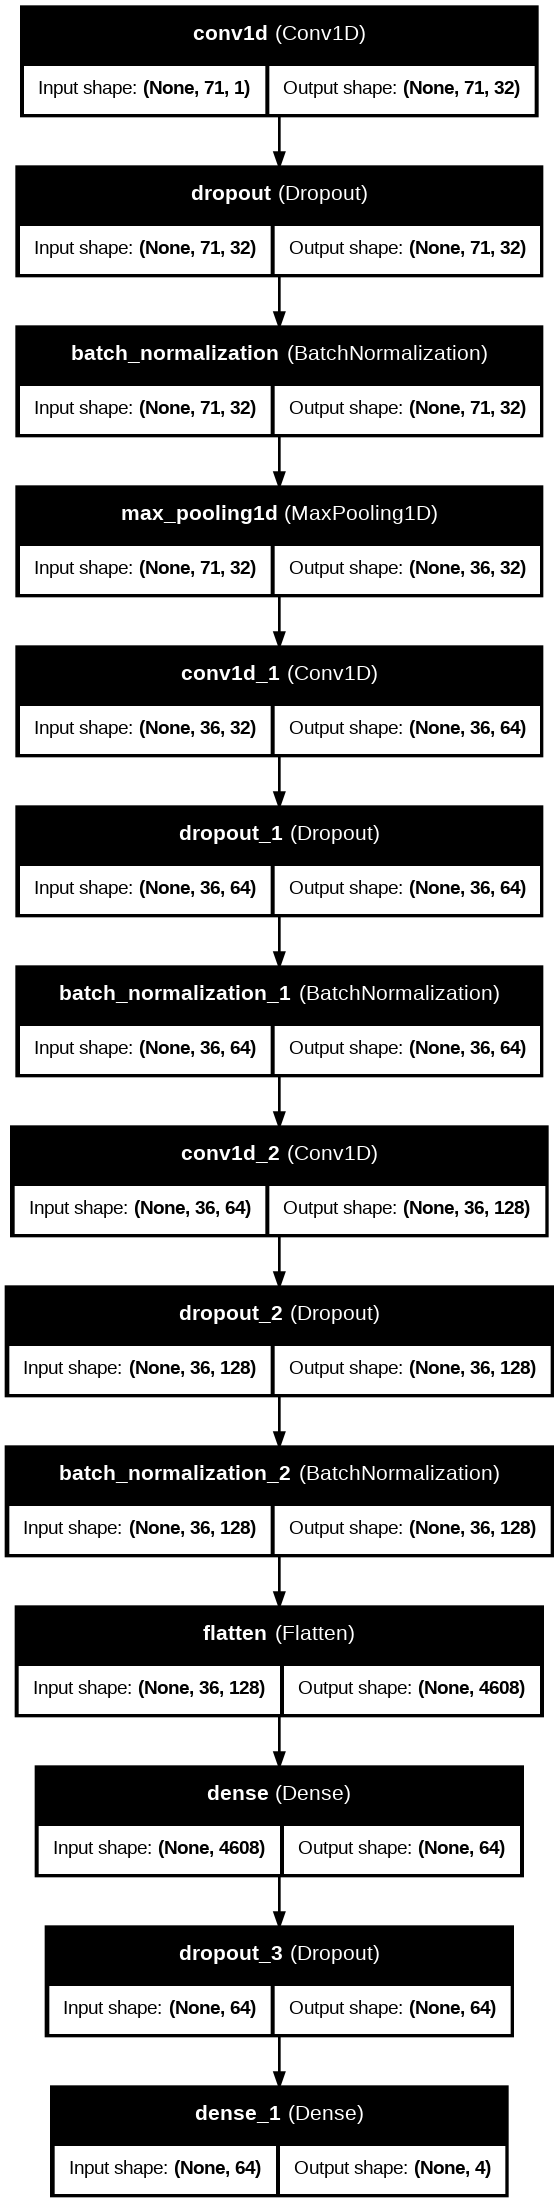

In [ ]:
plot_model(CNN_model1, to_file='CNN_model1.png', show_shapes=True, show_layer_names=True, dpi=96)

In [ ]:
CNN_model2 = CNN2(input_size2)
CNN_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 300, 16)        │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 300, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 150, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 150, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 150, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 150, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 75, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 75, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 75, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       307,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,812 (1.20 MB)

 Trainable params: 315,588 (1.20 MB)

 Non-trainable params: 224 (896.00 B)

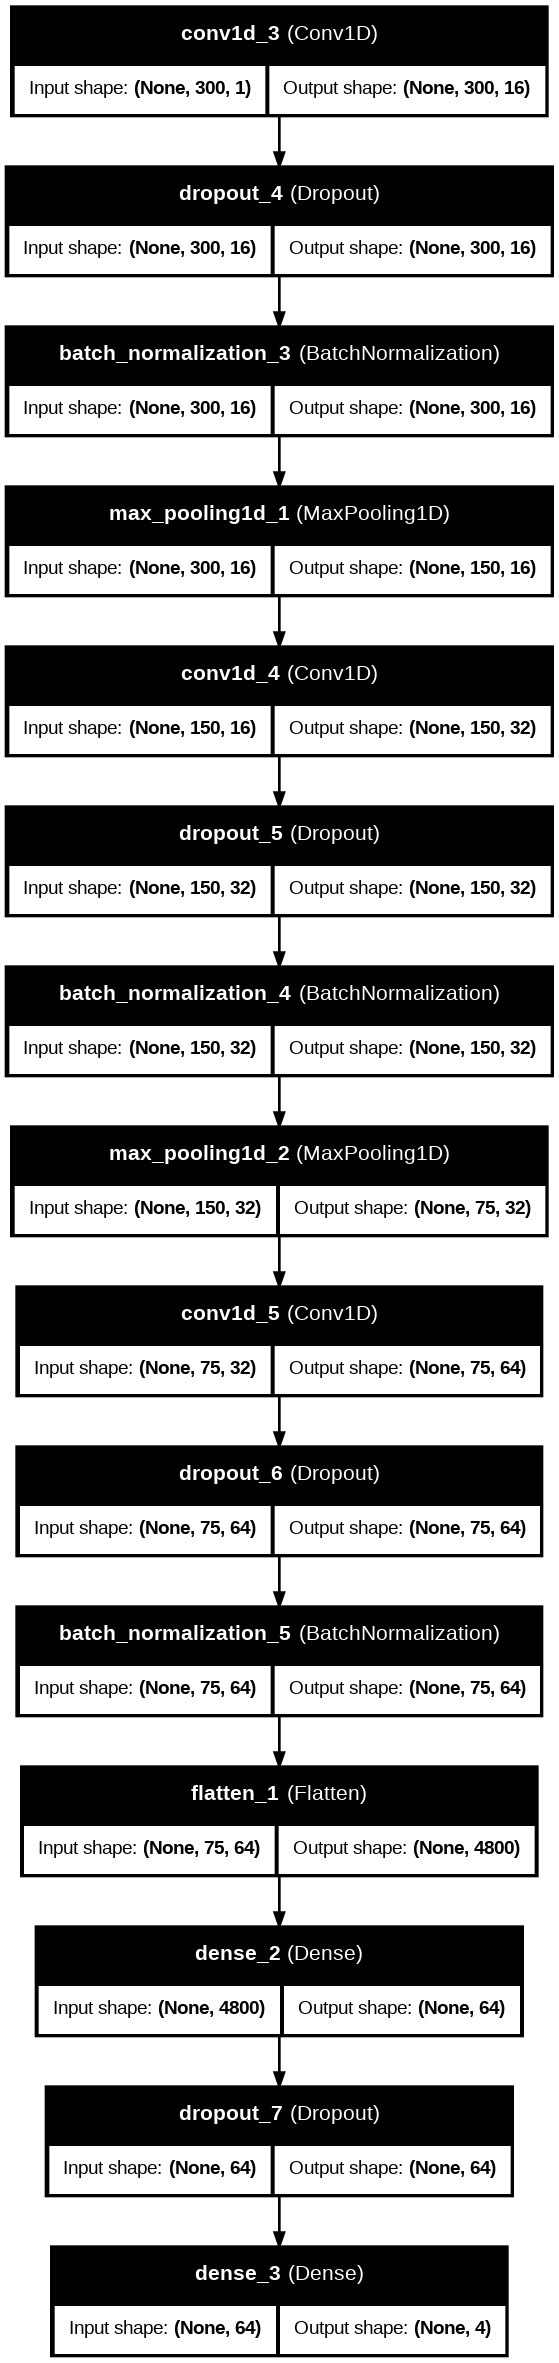

In [ ]:
plot_model(CNN_model2, to_file='CNN_model2.png', show_shapes=True, show_layer_names=True, dpi=96)

# CNN MODEL TRANNING WITH NUMERICAL FEATURES

In [ ]:
# Biên dịch mô hình với learning rate thấp hơn
CNN_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Kiểm tra dữ liệu
print("Kiểm tra NaN/Inf trong X_train1:", np.any(np.isnan(X_train1)), np.any(np.isinf(X_train1)))
print("Kiểm tra NaN/Inf trong Y_train1:", np.any(np.isnan(Y_train1)), np.any(np.isinf(Y_train1)))
print("Shape of X_train1:", X_train1.shape)  # (x, 71, 1)
print("Shape of Y_train1:", Y_train1.shape)  # (x, 4)
print("Sample of Y_train1:", Y_train1[:5])   # Kiểm tra one-hot
print("Min and Max of X_train1:", np.min(X_train1), np.max(X_train1))  # Kiểm tra phạm vi giá trị

# Kiểm tra phân bố nhãn
y_labels = np.argmax(Y_train1, axis=1)
print("Phân bố nhãn (tỷ lệ):", pd.Series(y_labels).value_counts(normalize=True))

# Định nghĩa callbacks
callbacks = [
    ModelCheckpoint('CNN_MODEL_ON_NUMERICAL_FEATURES.keras', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)
]

# Huấn luyện mô hình
CNN_results_1 = CNN_model1.fit(X_train1, Y_train1, validation_split=0.2, batch_size=64, epochs=100, callbacks=callbacks)

# Kiểm tra đầu ra mẫu
sample_pred = CNN_model1.predict(X_train1[:10])
print("Sample predictions:", sample_pred)
if np.any(np.isnan(sample_pred)):
    print("Predictions contain NaN!")

Kiểm tra NaN/Inf trong X_train1: False False
Kiểm tra NaN/Inf trong Y_train1: False False
Shape of X_train1: (308208, 71, 1)
Shape of Y_train1: (308208, 4)
Sample of Y_train1:         benign  defacement  malware  phishing
361050     0.0         1.0      0.0       0.0
257400     1.0         0.0      0.0       0.0
48934      0.0         1.0      0.0       0.0
229860     0.0         0.0      1.0       0.0
237583     0.0         1.0      0.0       0.0
Min and Max of X_train1: -2.0 30187.0
Phân bố nhãn (tỷ lệ): 0    0.274522
1    0.245944
3    0.243504
2    0.236029
Name: proportion, dtype: float64
Epoch 1/100
3853/3853 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - Precision: 0.8134 - Recall: 0.7055 - accuracy: 0.7656 - loss: 0.8331
Epoch 1: val_loss improved from inf to 0.52584, saving model to CNN_MODEL_ON_NUMERICAL_FEATURES.keras
3853/3853 ━━━━━━━━━━━━━━━━━━━━ 168s 42ms/step - Precision: 0.8134 - Recall: 0.7055 - accuracy: 0.7656 - loss: 0.8331 - val_Precision: 0.8512 - val_Recall: 0.7834 - val_ac

In [ ]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

2408/2408 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - Precision: 0.9430 - Recall: 0.9325 - accuracy: 0.9379 - loss: 0.1874


[0.18583868443965912,
 0.9375097155570984,
 0.9425240755081177,
 0.9317473769187927]

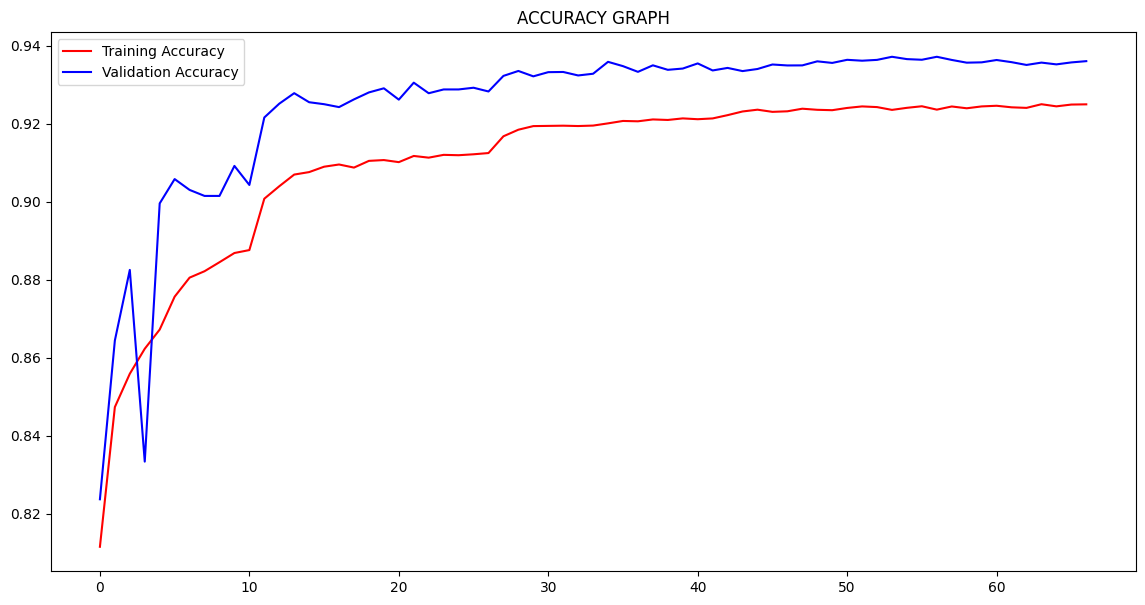

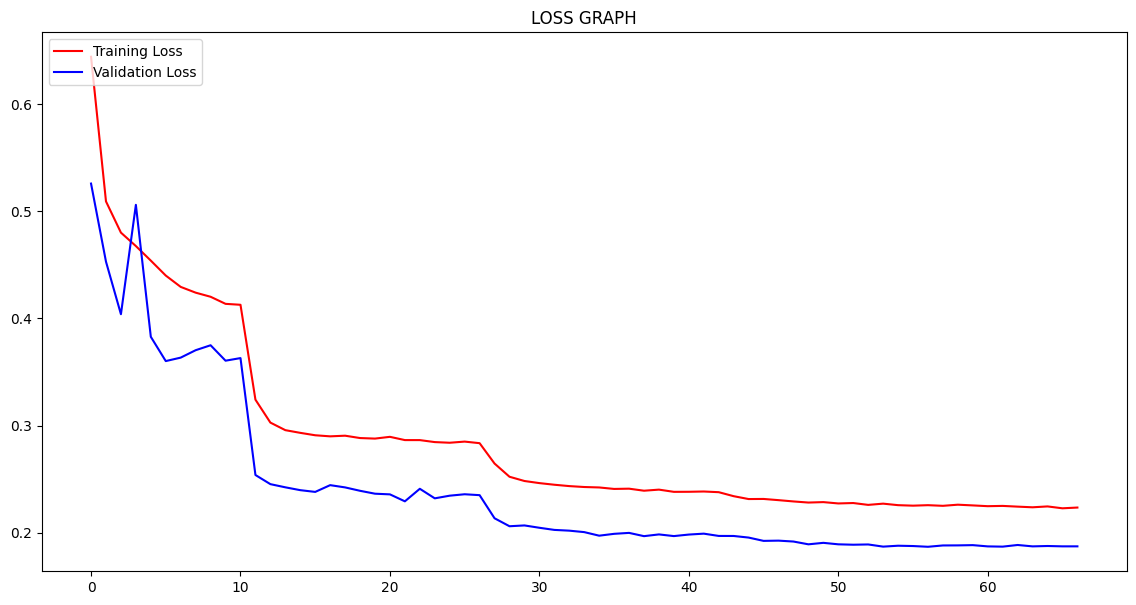

In [ ]:
eval_graph_CNN(CNN_results_1)

2408/2408 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


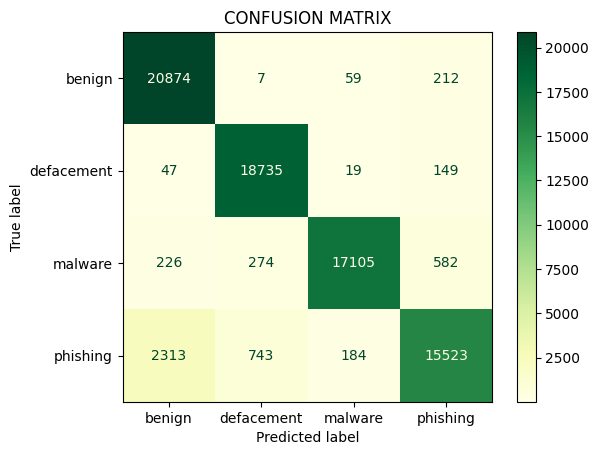

Macro F1-Score: 0.9368


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_class_CNN(X_test1, Y_test1, CNN_model1, label_names)

2408/2408 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


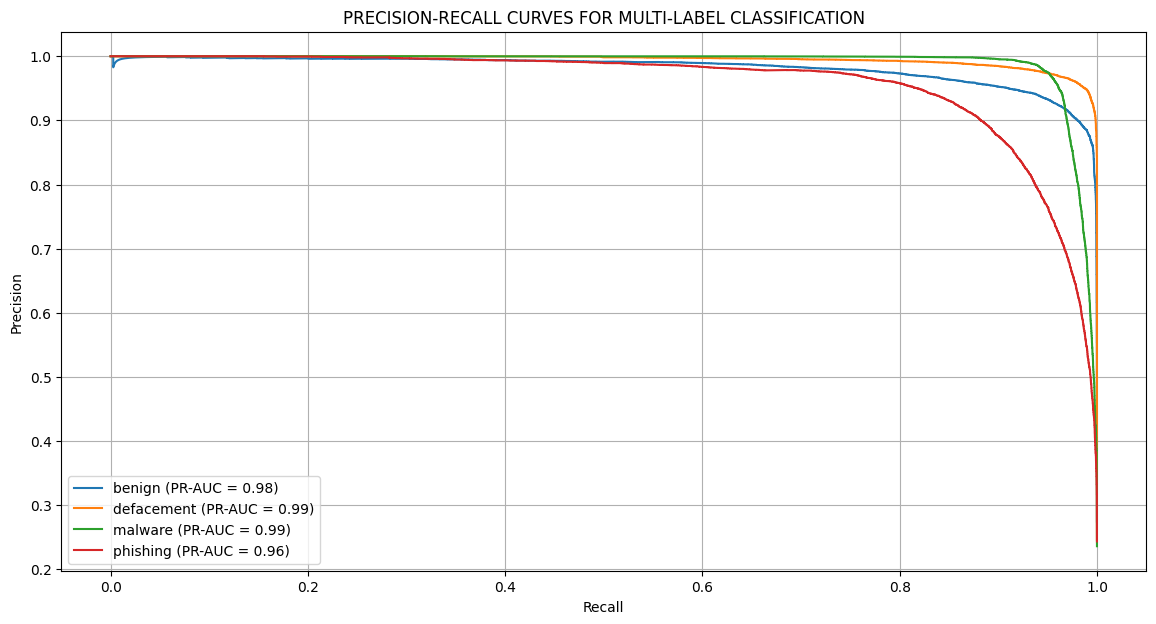

Macro PR-AUC: 0.9809


In [ ]:
pr_auc_multi_class_CNN(X_test1, Y_test1, CNN_model1, label_names)

# CNN MODEL TRANNING WITH NON-NUMERICAL FEATURES

In [ ]:
class_weights = {0: 0.9, 1: 1.0, 2: 1.1, 3: 1.05}

CNN_model2 = CNN2(input_size2)
CNN_model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Kiểm tra phân bố nhãn
y_labels = np.argmax(Y_train2, axis=1)
print("Phân bố nhãn (tỷ lệ):", pd.Series(y_labels).value_counts(normalize=True))

# Định nghĩa callbacks
callbacks = [
    ModelCheckpoint(
        'CNN_MODEL_ON_NON_NUMERICAL_FEATURES.weights.h5',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)
]

# Huấn luyện mô hình
CNN_results_2 = CNN_model2.fit(
    X_train2,
    Y_train2,
    validation_split=0.2,
    batch_size=128,
    epochs=100,
    class_weight=class_weights,
    callbacks=callbacks
)

# Kiểm tra đầu ra mẫu
sample_pred = CNN_model2.predict(X_train2[:10])
print("Sample predictions:", sample_pred)
if np.any(np.isnan(sample_pred)):
    print("Predictions contain NaN!")

Phân bố nhãn (tỷ lệ): 0    0.274520
1    0.245947
3    0.243507
2    0.236027
Name: proportion, dtype: float64
Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - Precision: 0.7558 - Recall: 0.6226 - accuracy: 0.7036 - loss: 1.4498
Epoch 1: val_loss improved from inf to 0.59896, saving model to CNN_MODEL_ON_NON_NUMERICAL_FEATURES.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 116s 117ms/step - Precision: 0.7559 - Recall: 0.6227 - accuracy: 0.7036 - loss: 1.4494 - val_Precision: 0.8577 - val_Recall: 0.7685 - val_accuracy: 0.8186 - val_loss: 0.5990 - learning_rate: 5.0000e-04
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - Precision: 0.8353 - Recall: 0.7526 - accuracy: 0.8023 - loss: 0.6291
Epoch 2: val_loss improved from 0.59896 to 0.55362, saving model to CNN_MODEL_ON_NON_NUMERICAL_FEATURES.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 113ms/step - Precision: 0.8353 - Recall: 0.7526 - accuracy: 0.8023 - loss: 0.6290 - val_Precision: 0.8498 - val_Recall: 0.7956 - val_accuracy: 0.8

In [ ]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

2408/2408 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - Precision: 0.8625 - Recall: 0.8416 - accuracy: 0.8530 - loss: 0.3937


[0.3912268877029419,
 0.8532030582427979,
 0.8627192974090576,
 0.8418600559234619]

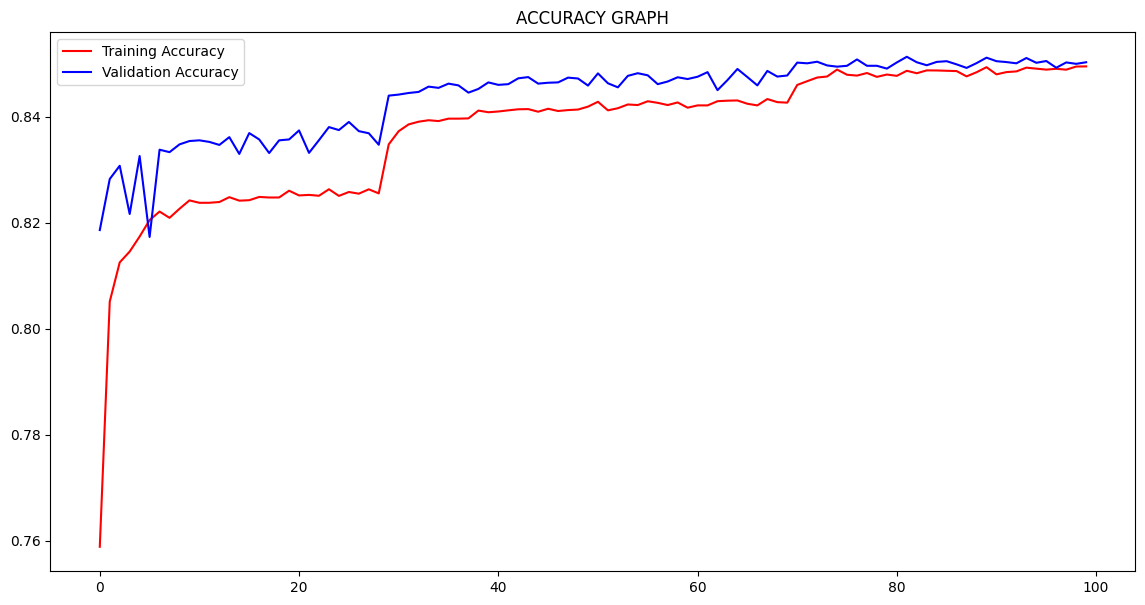

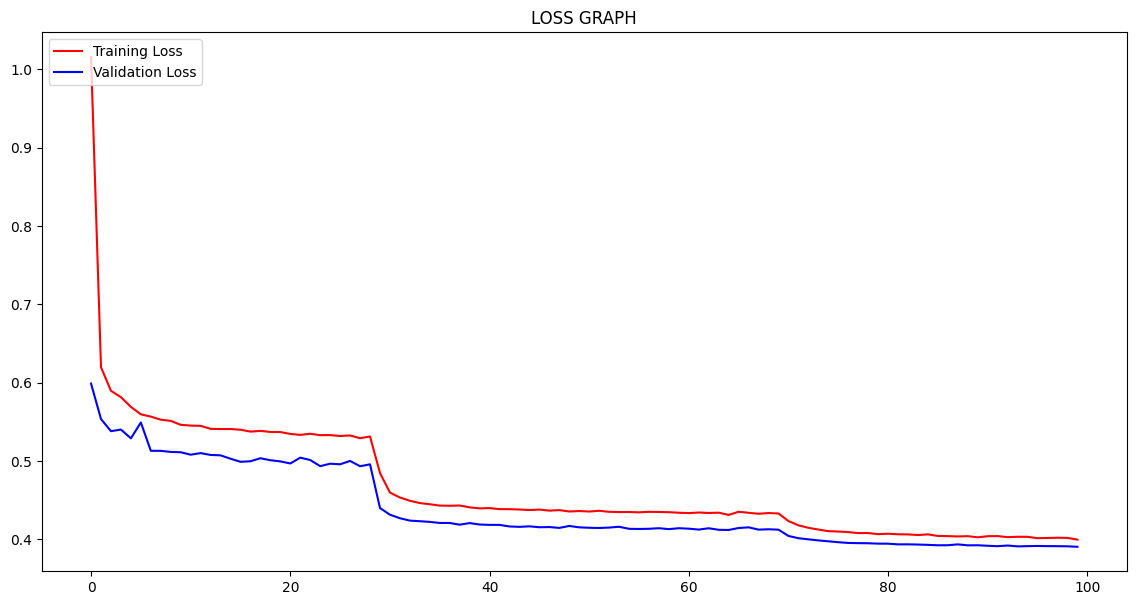

In [ ]:
eval_graph_CNN(CNN_results_2)

2408/2408 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step


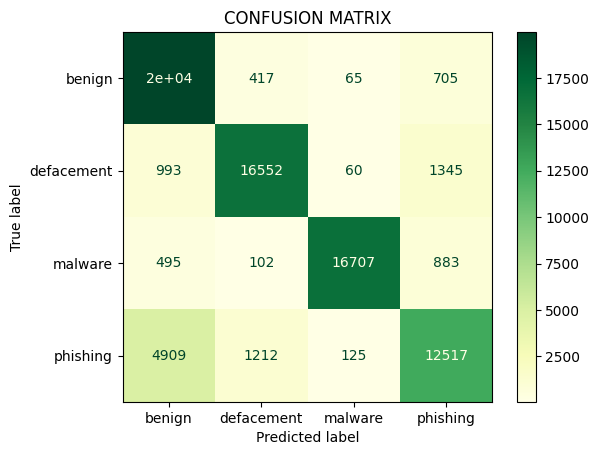

Macro F1-Score: 0.8530


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_class_CNN(X_test2, Y_test2, CNN_model2, label_names)

2408/2408 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step


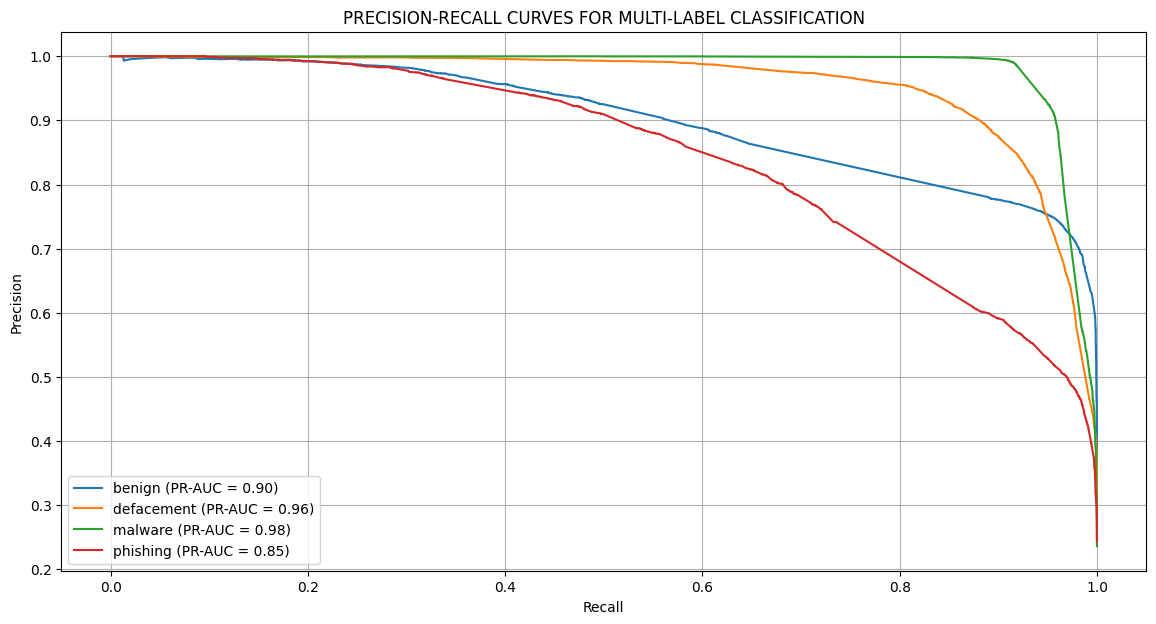

Macro PR-AUC: 0.9214


In [ ]:
pr_auc_multi_label(X_test2, Y_test2, CNN_model2, label_names)

In [ ]:
CNN_model2.save('CNN_MODEL_ON_NON_NUMERICAL_FEATURES.keras')

# XGB MODEL (Multi-Classes)

In [24]:
# Kiểm tra phân bố nhãn
print("Phân bố nhãn (tỷ lệ):", pd.Series(Y3).value_counts(normalize=True))

# 3. XGB cải tiến
XGB = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    learning_rate=0.08,
    n_estimators=300,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.5,
    reg_alpha=0.5,
    eval_metric=['mlogloss', 'merror'],
    random_state=42,
    n_jobs=-1
)

Phân bố nhãn (tỷ lệ): 0    0.274521
1    0.245943
3    0.243506
2    0.236030
Name: proportion, dtype: float64


# XGB TRANNING WITH NUMERICAL FEATURES

In [25]:
XGB.fit(
    X_train3,
    Y_train3,
    eval_set=[(X_test3, Y_test3)],
    verbose=50
)

[0]	validation_0-mlogloss:1.26810	validation_0-merror:0.10152
[50]	validation_0-mlogloss:0.22262	validation_0-merror:0.06253
[100]	validation_0-mlogloss:0.15349	validation_0-merror:0.05042
[150]	validation_0-mlogloss:0.12899	validation_0-merror:0.04249
[200]	validation_0-mlogloss:0.11521	validation_0-merror:0.03803
[250]	validation_0-mlogloss:0.10564	validation_0-merror:0.03530
[299]	validation_0-mlogloss:0.09870	validation_0-merror:0.03286


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1, num_class=4, ...)

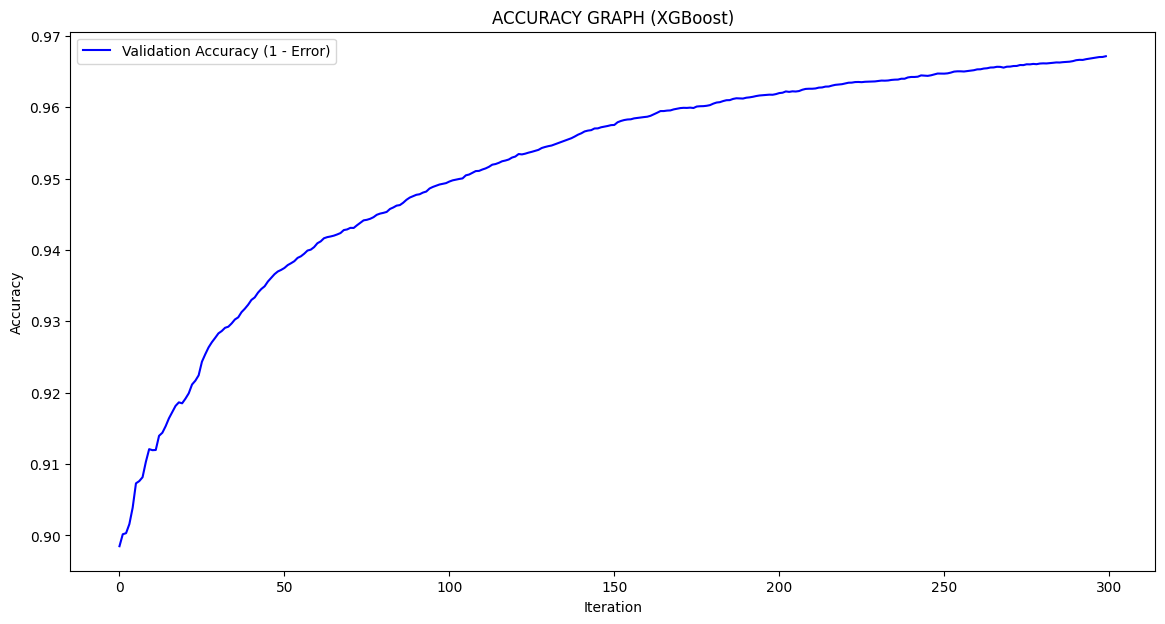

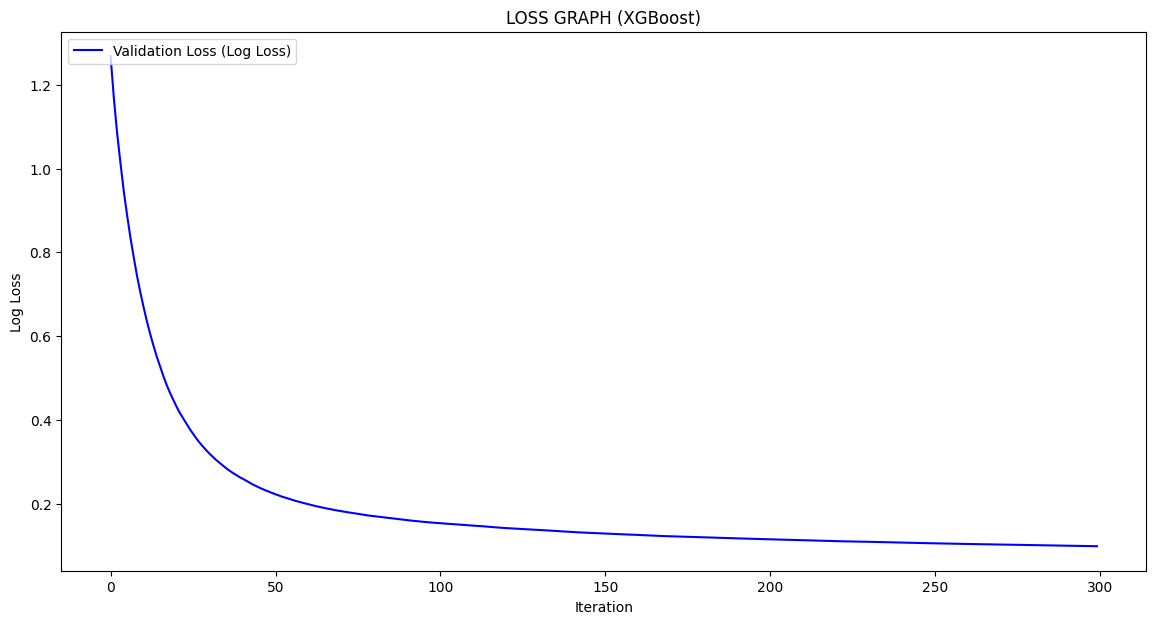

In [26]:
results = XGB.evals_result()
eval_graph_XGB(results)

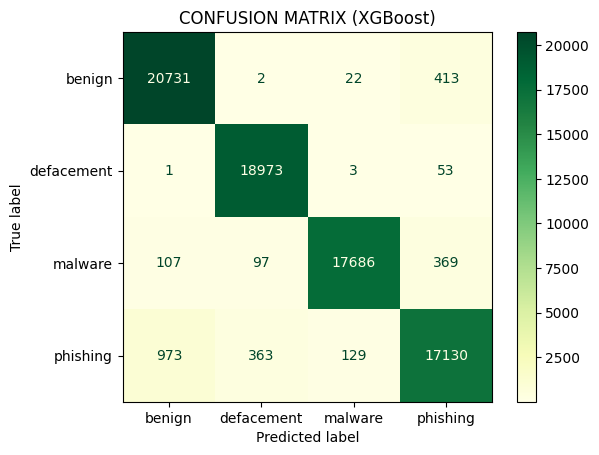

Macro F1-Score: 0.9670


In [27]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_class_XGB(X_test3, Y_test3, XGB, label_names)

In [28]:
XGB.save_model('XGB_MODEL_ON_NUMERICAL_FEATURES.json')

# XGB TRANNING WITH NON-NUMERICAL FEATURES

In [ ]:
XGB.fit(
    X_train4,
    Y_train4,
    eval_set=[(X_test4, Y_test4)],
    verbose=True,  # Enable verbose output for monitoring
)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:11:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-mlogloss:1.30254	validation_0-merror:0.31167
[0]	validation_0-mlogloss:1.30254	validation_0-merror:0.31167
[1]	validation_0-mlogloss:1.23485	validation_0-merror:0.33345
[1]	validation_0-mlogloss:1.23485	validation_0-merror:0.33345
[2]	validation_0-mlogloss:1.17656	validation_0-merror:0.32468
[2]	validation_0-mlogloss:1.17656	validation_0-merror:0.32468
[3]	validation_0-mlogloss:1.12653	validation_0-merror:0.32339
[3]	validation_0-mlogloss:1.12653	validation_0-merror:0.32339
[4]	validation_0-mlogloss:1.08457	validation_0-merror:0.32299
[4]	validation_0-mlogloss:1.08457	validation_0-merror:0.32299
[5]	validation_0-mlogloss:1.04691	validation_0-merror:0.32246
[5]	validation_0-mlogloss:1.04691	validation_0-merror:0.32246
[6]	validation_0-mlogloss:1.01425	validation_0-merror:0.32300
[6]	validation_0-mlogloss:1.01425	validation_0-merror:0.32300
[7]	validation_0-mlogloss:0.98443	validation_0-merror:0.32165
[7]	validation_0-mlogloss:0.98443	validation_0-merror:0.32165
[8]	vali

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EvaluationMonitor object at 0x784e6a30d390>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss', 'merror'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

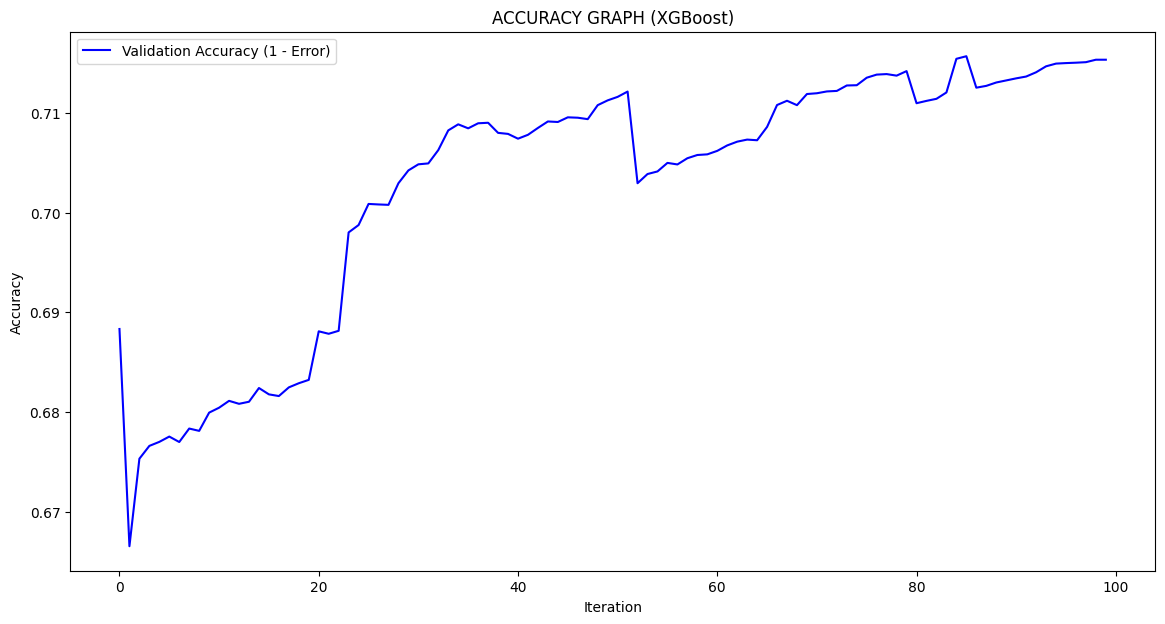

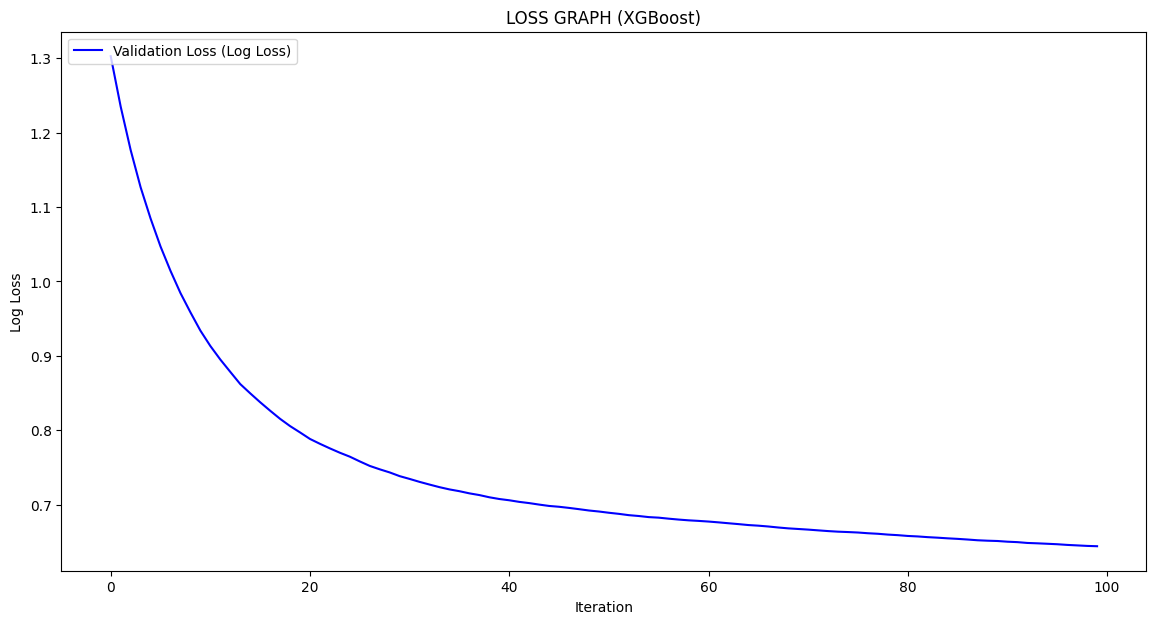

In [ ]:
results = XGB.evals_result()
eval_graph_XGB(results)

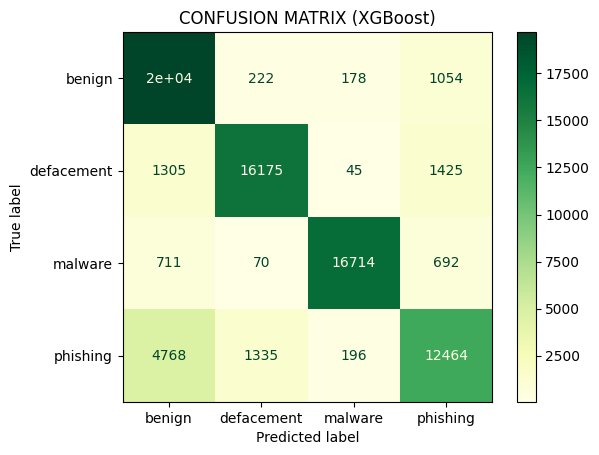

Macro F1-Score: 0.8446


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_class_XGB(X_test4, Y_test4, XGB, label_names)

In [ ]:
joblib.dump(XGB, 'XGB_MODEL_ON_NON_NUMERICAL_FEATURES.pkl')

['XGB_MODEL_ON_NON_NUMERICAL_FEATURES.pkl']

# RANDOM FOREST MODEL (Multi-Classes)

In [ ]:
# Kiểm tra phân bố nhãn
print("Phân bố nhãn (tỷ lệ):", pd.Series(Y3).value_counts(normalize=True))

RF = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

Phân bố nhãn (tỷ lệ): 0    0.274521
1    0.245943
3    0.243506
2    0.236030
Name: proportion, dtype: float64


# RANDOM FOREST TRAINNING WITH NUMERICAL FEATURES

In [ ]:
RF.fit(X_train3, Y_train3)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_jobs=-1,
                       random_state=42)

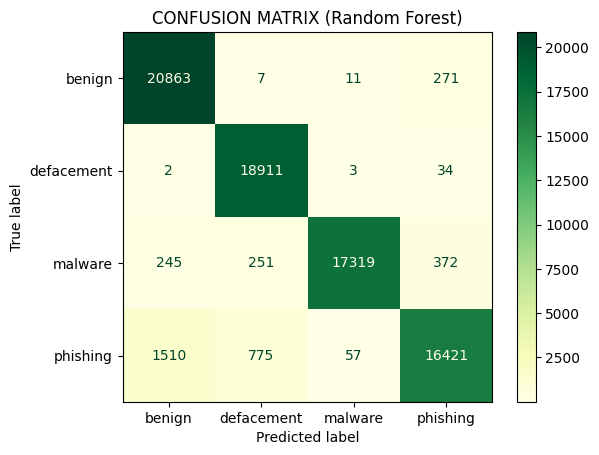

Macro F1-Score: 0.9538


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_class_RF(X_test3, Y_test3, RF, label_names)

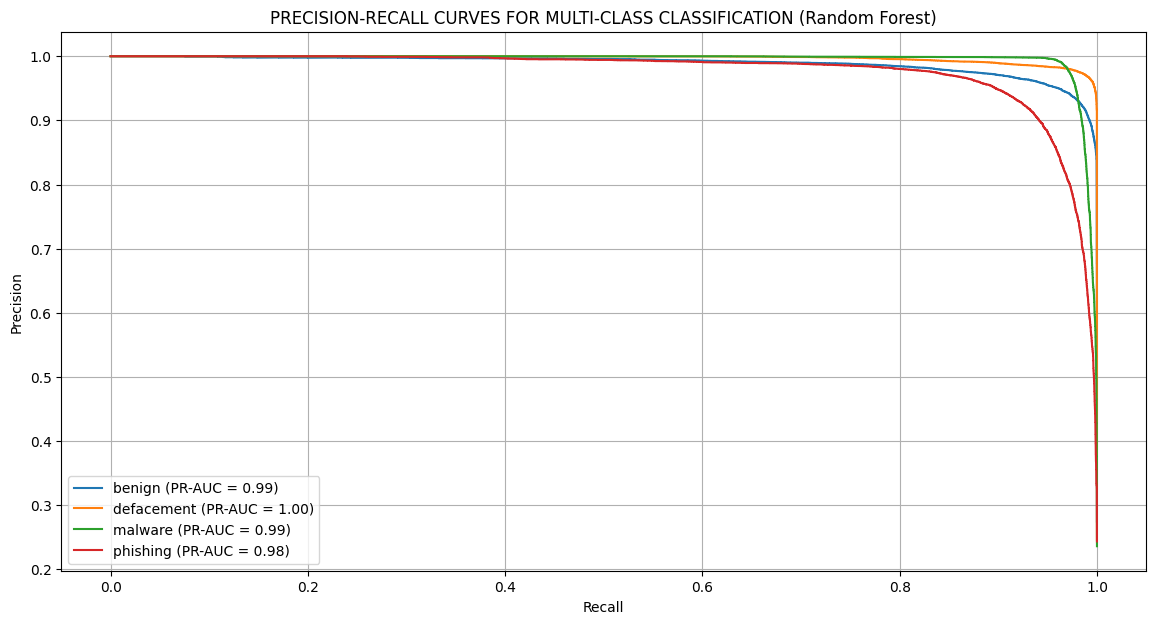

Macro PR-AUC: 0.9891


In [ ]:
pr_auc_multi_class_RF(X_test3, Y_test3, RF, label_names)

In [ ]:
joblib.dump(RF, 'RF_MODEL_ON_NUMERICAL_FEATURES.pkl')

['RF_MODEL_ON_NON_NUMERICAL_FEATURES.pkl']

# RANDOM FOREST TRAINNING WITH NON-NUMERICAL FEATURES

In [ ]:
RF.fit(X_train4, Y_train4)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_jobs=-1,
                       random_state=42)

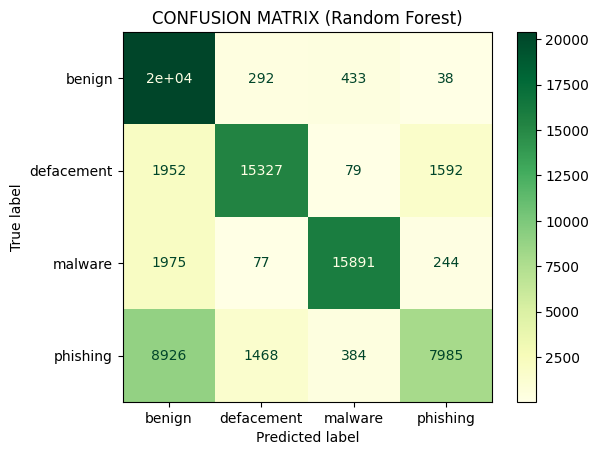

Macro F1-Score: 0.7663


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_class_RF(X_test4, Y_test4, RF, label_names)

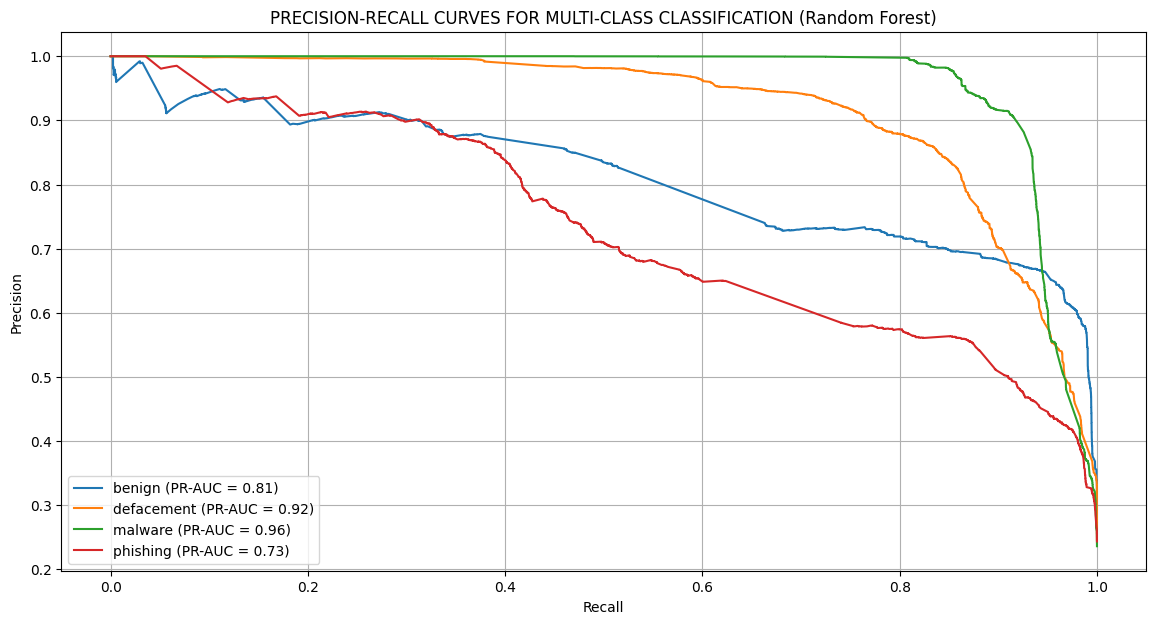

Macro PR-AUC: 0.8568


In [ ]:
pr_auc_multi_class_RF(X_test4, Y_test4, RF, label_names)

In [ ]:
joblib.dump(RF, 'RF_MODEL_ON_NON_NUMERICAL_FEATURES.pkl')

['RF_MODEL_ON_NON_NUMERICAL_FEATURES.pkl']

# TRANSFORMERS MODEL (BERT-Multi-Classes)

In [ ]:
class Transformer(nn.Module):
    def __init__(self, transformer, num_classes=4):
        super(Transformer, self).__init__()
        self.transformer = transformer
        self.fc = nn.Sequential(
            nn.Linear(768, 512),  # Từ BERT pooler output
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)  # Output 4 classes
        )

    def forward(self, input_ids, attention_mask, numerical_features=None):
        transformer_output = self.transformer(input_ids=input_ids, attention_mask=attention_mask).pooler_output
        logits = self.fc(transformer_output)
        return logits  # Trả logits, softmax sẽ áp dụng ở evaluation nếu cần

In [ ]:
transformer_model = BertModel.from_pretrained('bert-base-uncased')
transformer_model_only = Transformer(transformer_model, num_classes=4).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
input_data = {
    "input_ids": train_encodings_trans['input_ids'][:1].to(device),
    "attention_mask": train_encodings_trans['attention_mask'][:1].to(device)
}

In [ ]:
summary(transformer_model_only, input_data=input_data)

Layer (type:depth-idx)                                       Output Shape              Param #
Transformer                                                  [1, 4]                    --
├─BertModel: 1-1                                             [1, 768]                  --
│    └─BertEmbeddings: 2-1                                   [1, 64, 768]              --
│    │    └─Embedding: 3-1                                   [1, 64, 768]              23,440,896
│    │    └─Embedding: 3-2                                   [1, 64, 768]              1,536
│    │    └─Embedding: 3-3                                   [1, 64, 768]              393,216
│    │    └─LayerNorm: 3-4                                   [1, 64, 768]              1,536
│    │    └─Dropout: 3-5                                     [1, 64, 768]              --
│    └─BertEncoder: 2-2                                      [1, 64, 768]              --
│    │    └─ModuleList: 3-6                                  --             

# TRANSFORMERS TRANNING WITH NON-NUMERICAL FEATURES

In [ ]:
def train_model(model, train_loader, test_loader, model_name, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()  # Multi-class loss
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

    # Freezing layers (giống cũ)
    for param in model.transformer.parameters():
        param.requires_grad = False
    for param in model.transformer.encoder.layer[-2:].parameters():
        param.requires_grad = True
    for param in model.transformer.pooler.parameters():
        param.requires_grad = True
    for param in model.fc.parameters():
        param.requires_grad = True

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

        avg_loss = total_loss / len(train_loader)
        train_accuracy = correct / total
        history['loss'].append(avg_loss)
        history['accuracy'].append(train_accuracy)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                logits = model(input_ids, attention_mask)
                loss = criterion(logits, labels)
                val_loss += loss.item()
                predictions = torch.argmax(logits, dim=1)
                correct += (predictions == labels).sum().item()
                total += labels.size(0)

        avg_val_loss = val_loss / len(test_loader)
        val_accuracy = correct / total
        history['val_loss'].append(avg_val_loss)
        history['val_accuracy'].append(val_accuracy)

        print(f'{model_name} - Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

        torch.save(model.state_dict(), f'{model_name}.pth')

        torch.cuda.empty_cache()
        gc.collect()

    return history

In [ ]:
results = train_model(
    transformer_model_only,
    train_loader_trans,
    test_loader_trans,
    'TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES',
    epochs=10
)

TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 1, Loss: 0.1663, Train Acc: 0.9429, Val Loss: 0.0902, Val Acc: 0.9708
TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 2, Loss: 0.0908, Train Acc: 0.9694, Val Loss: 0.0848, Val Acc: 0.9738
TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 3, Loss: 0.0741, Train Acc: 0.9746, Val Loss: 0.0694, Val Acc: 0.9774
TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 4, Loss: 0.0648, Train Acc: 0.9780, Val Loss: 0.0597, Val Acc: 0.9808
TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 5, Loss: 0.0570, Train Acc: 0.9806, Val Loss: 0.0544, Val Acc: 0.9822
TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 6, Loss: 0.0513, Train Acc: 0.9823, Val Loss: 0.0570, Val Acc: 0.9823
TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 7, Loss: 0.0465, Train Acc: 0.9840, Val Loss: 0.0555, Val Acc: 0.9831
TRANSFORMERS_MODEL_ON_NON_NUMERICAL_FEATURES - Epoch 8, Loss: 0.0422, Train Acc: 0.9854, Val Loss: 0.0539, Val Acc: 0.9840
TRANSFORMERS_MOD

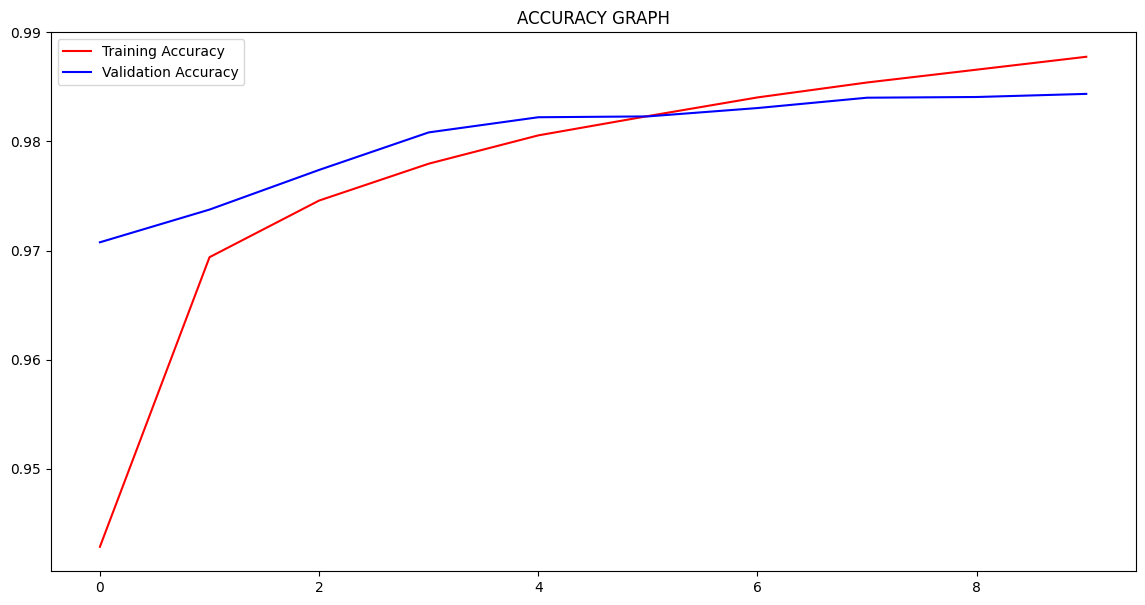

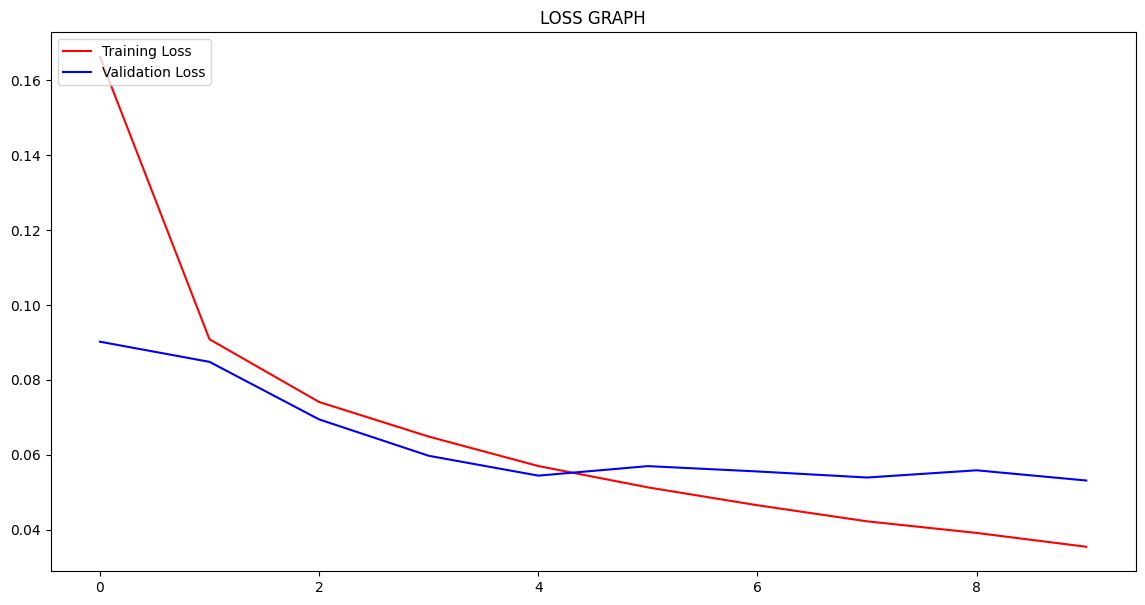

In [ ]:
eval_graph_BERT(results)

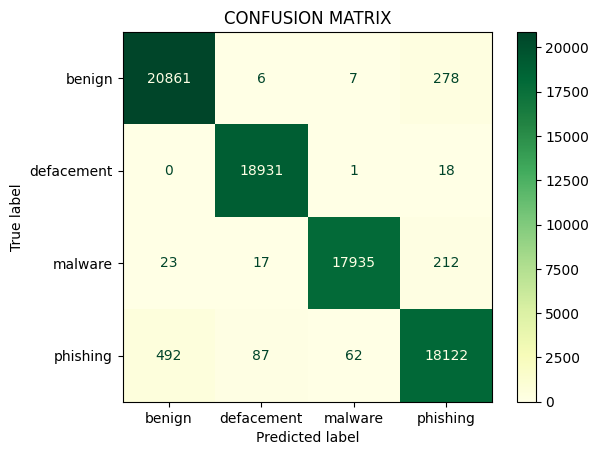

Macro F1-Score: 0.9845


In [ ]:
label_names = ['benign', 'defacement', 'malware', 'phishing']
conf_matrix_multi_class_BERT(test_loader_trans, y_test5, transformer_model_only, label_names, tokenizer)

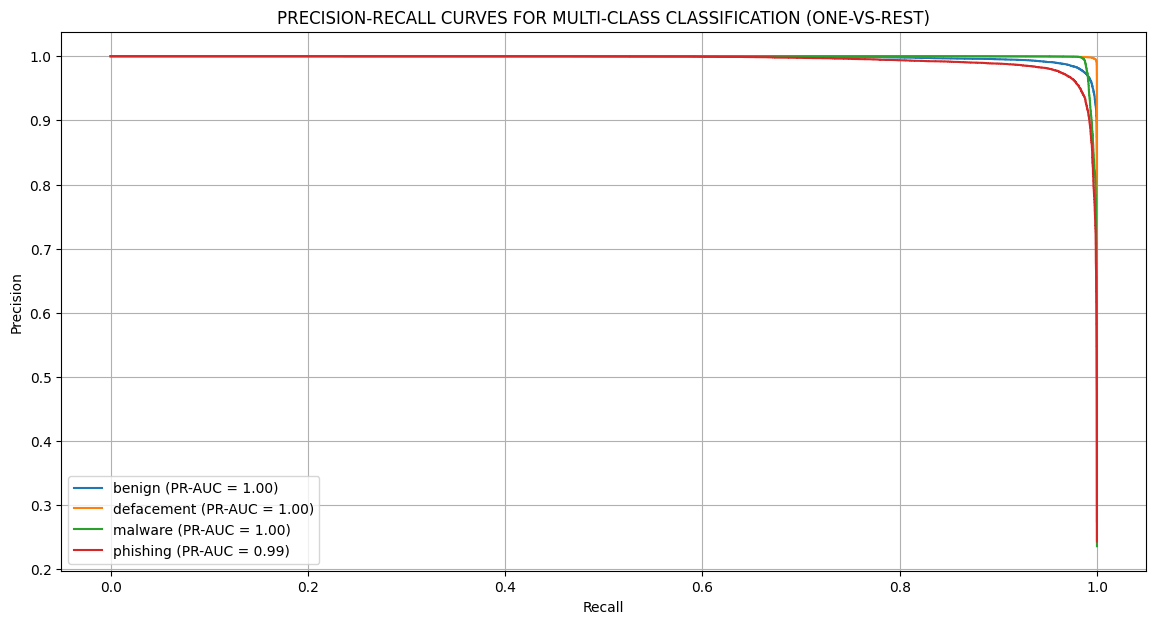

Macro PR-AUC: 0.9977


In [ ]:
pr_auc_multi_class_BERT(X_test5, y_test5, transformer_model_only, label_names, tokenizer)